# Download Stable Diffusion

1 - Log into Huggin Face and accept [Stable Diffusion License](https://huggingface.co/CompVis/stable-diffusion-v1-4)  
2 - [Generate a token here](https://huggingface.co/settings/tokens) and copy it

In [6]:
with open('huggingface_token.token') as f:
    lines = f.readlines()
    
token = lines[0]

- Let's check if our GPU is visible to docker. You should see the name of your GPU somewhere in this table.

In [2]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce GTX 1080 (UUID: GPU-7503f038-6585-936e-b4a7-16528831e40d)


In [3]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

- Check if GPU is visible to pyTorch

In [4]:
torch.cuda.is_available()

True

- Load the model from Hugging Face (download will take time)


In [ ]:
# from diffusers import StableDiffusionPipeline
# import torch

# model_id = "runwayml/stable-diffusion-v1-5"
# pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16")
# pipe = pipe.to("cuda")

# prompt = "a photo of an astronaut riding a horse on mars"
# image = pipe(prompt).images[0]  
    
# image.save("astronaut_rides_horse.png")


In [6]:
# MODIFIED CELL
model_id = "runwayml/stable-diffusion-v1-5"
model = StableDiffusionPipeline.from_pretrained(
        model_id,
        use_auth_token=token,
        revision='fp16',
        torch_dtype=torch.float16,
    )
model.save_pretrained('models/stable-diffusion-v1.5')

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/284 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/636 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/822 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/609 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

In [6]:
# # ORIGINAL CELL 
# import os 

# if "stable-diffusion-v1.4" in os.listdir("models"):
#     model = StableDiffusionPipeline.from_pretrained('models/stable-diffusion-v1.4')
# else:
#     model = StableDiffusionPipeline.from_pretrained(
#         'CompVis/stable-diffusion-v1-4',
#         use_auth_token=token,
#         revision='fp16',
#         torch_dtype=torch.float16,
#     )
#     model.save_pretrained('models/stable-diffusion-v1.4')

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

- save model on your disk for later usage

In [7]:
# model.save_pretrained('models/stable-diffusion-v1.4')
model.save_pretrained('models/stable-diffusion-v1.5')

# Demo

- check GPU usage

In [8]:
torch.cuda.empty_cache()
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |
|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |
|---------------------------------------------------------------------------|
| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |

- move model to the GPU

In [9]:
prompt = 'an epic flowering alien landscape in the style of origami, 8 k, cinematic light, artstation'

model = model.to('cuda')

with autocast('cuda'):
    output = model(prompt)
    

  0%|          | 0/51 [00:00<?, ?it/s]

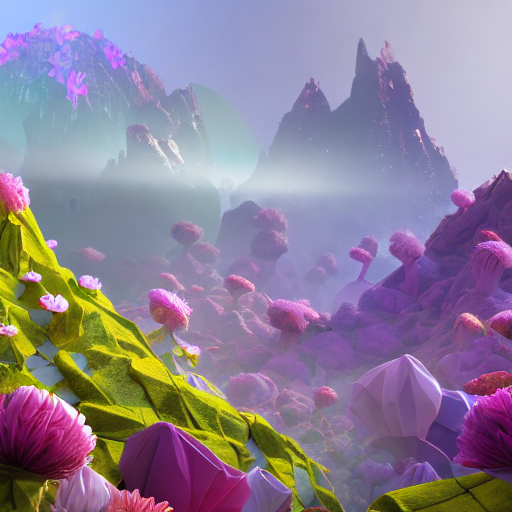

In [10]:
output.images[0].show()

# CUDA out of memory ?
try to use 'enable_attention_slicing()' methods

{'trained_betas'} was not found in config. Values will be initialized to default values.


  0%|          | 0/51 [00:00<?, ?it/s]

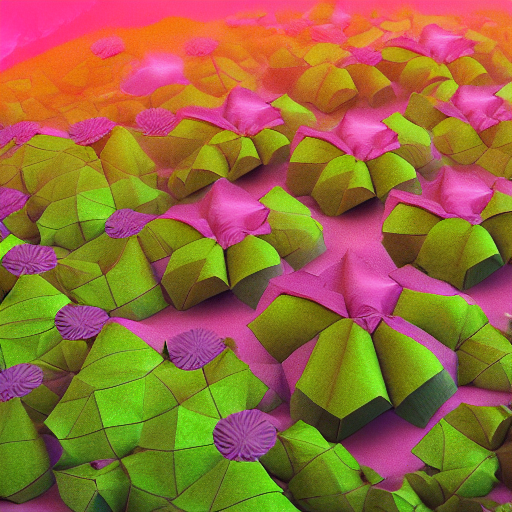

In [5]:
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=token
)

prompt = 'an epic flowering alien landscape in the style of origami, 8 k, cinematic light, artstation'

pipe = pipe.to("cuda")

pipe.enable_attention_slicing()

with autocast("cuda"):
    images = pipe(prompt)
    
images['sample'][0]